In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')

In [70]:
df = pd.read_csv('./climate_change.csv')
df.head()

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked
0,I'm afraid climate change is going to kill me!...,718,Will_Power,1.550104e+09,534,0.98,aqdmbz,climatechange,False,Feeling scared? Have you been listening to or ...,True,False,True,False
1,The r/climatechange Verified User Flair Program,30,technologyisnatural,1.661115e+09,14,0.91,wu9zny,climatechange,False,r/climatechange is a community centered around...,True,False,True,False
2,How come some environmentalists are against ca...,75,SnooMarzipans7682,1.697987e+09,296,0.75,17dv720,climatechange,False,It seems like if we could capture all of the c...,True,False,False,False
3,Solar and wind are better than nuclear,21,Consistent_Piano_210,1.698006e+09,26,0.70,17e251o,climatechange,False,Taken from a discussion:\n\nNickel Iron batter...,True,False,False,False
4,When will we hit 2 degrees of global warming?,9,ging289,1.698013e+09,30,0.74,17e506w,climatechange,False,Now we can't avoid hitting 1.5 degrees so I as...,True,False,False,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9393 entries, 0 to 9392
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        9393 non-null   object 
 1   Score        9393 non-null   int64  
 2   Autor        9189 non-null   object 
 3   Time         9393 non-null   float64
 4   Comments     9393 non-null   int64  
 5   UpvoteRatio  9393 non-null   float64
 6   PostId       9393 non-null   object 
 7   Subreddit    9393 non-null   object 
 8   is_nsfw      9393 non-null   bool   
 9   SelfText     1593 non-null   object 
 10  IsSelfText   9393 non-null   bool   
 11  IsPinned     9393 non-null   bool   
 12  IsStickied   9393 non-null   bool   
 13  IsLocked     9393 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(5)
memory usage: 706.4+ KB


### Get statistics from numeric columns

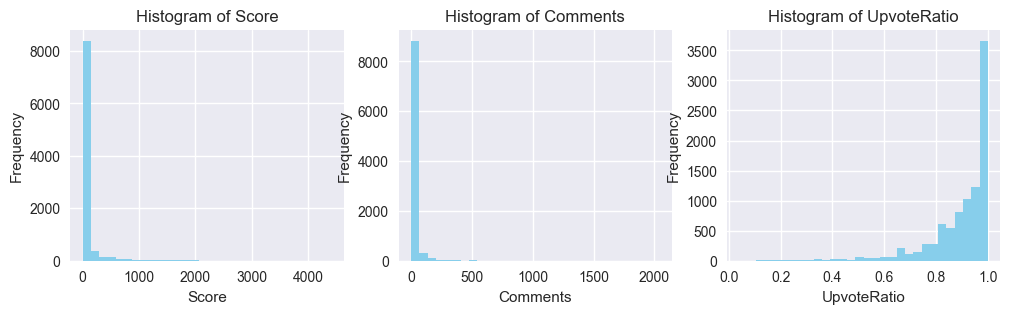

In [72]:
numeric_columns = ['Score', 'Comments', 'UpvoteRatio']

def plot_histogram(column_name, color, index):
    plt.subplot(1, len(numeric_columns), index)
    plt.hist(df[column_name], bins=30, color=color)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')

# Create charts
plt.figure(figsize=(12, 3))
for index, column_name in enumerate(numeric_columns):
    plot_histogram(column_name, 'skyblue', index + 1)
plt.show();

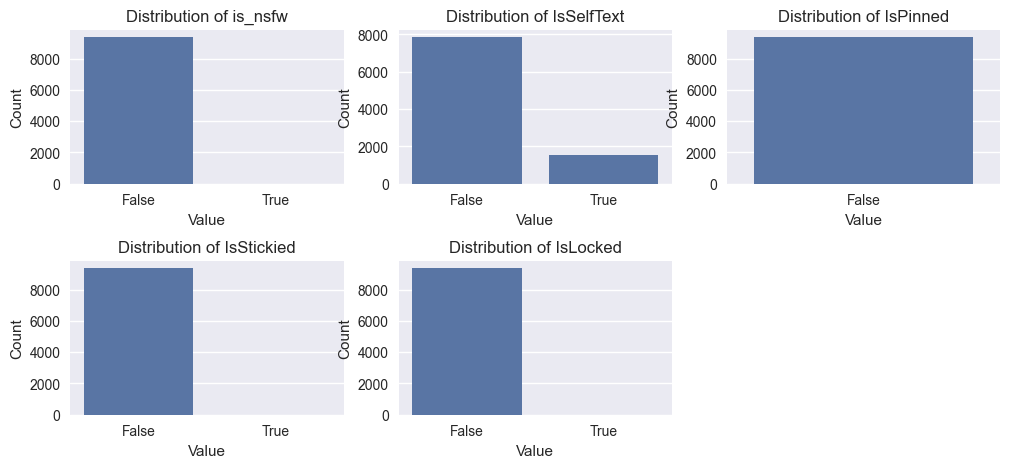

In [73]:
boolean_columns = ['is_nsfw', 'IsSelfText', 'IsPinned', 'IsStickied', 'IsLocked']

def plot_bar_colunt(column_name, column_index):
    plt.subplot(2, 3, column_index)
    sns.countplot(data=df, x=column_name);
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')

plt.figure(figsize=(12, 5))
for index, column_name in enumerate(boolean_columns):
    plot_bar_colunt(column_name, index + 1)
plt.subplots_adjust(hspace=0.5)
plt.show();

# Get unique words

In [74]:
import nltk
from nltk.tokenize import word_tokenize

In [75]:
text = df[['Title', 'SelfText']]
x = []
text['Title']

0       I'm afraid climate change is going to kill me!...
1         The r/climatechange Verified User Flair Program
2       How come some environmentalists are against ca...
3                  Solar and wind are better than nuclear
4           When will we hit 2 degrees of global warming?
                              ...                        
9388    Marine heatwave impact on corals worse than pr...
9389    California’s Waves Are Getting Bigger With Cli...
9390    Mountains are collapsing: A Swiss mountain pea...
9391    Study reveals Greenland's ice is much more sen...
9392    Forests Are Losing Their Ability to Hold Carbo...
Name: Title, Length: 9393, dtype: object

In [76]:
#tokenized_words = word_tokenize()

# Create columns

In [77]:
df['TitleLength'] = df['Title'].str.len()
df['SelfTextLength'] = df['SelfText'].str.len()

In [78]:
df.head()

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked,TitleLength,SelfTextLength
0,I'm afraid climate change is going to kill me!...,718,Will_Power,1.550104e+09,534,0.98,aqdmbz,climatechange,False,Feeling scared? Have you been listening to or ...,True,False,True,False,52,1496.0
1,The r/climatechange Verified User Flair Program,30,technologyisnatural,1.661115e+09,14,0.91,wu9zny,climatechange,False,r/climatechange is a community centered around...,True,False,True,False,47,3164.0
2,How come some environmentalists are against ca...,75,SnooMarzipans7682,1.697987e+09,296,0.75,17dv720,climatechange,False,It seems like if we could capture all of the c...,True,False,False,False,71,219.0
3,Solar and wind are better than nuclear,21,Consistent_Piano_210,1.698006e+09,26,0.70,17e251o,climatechange,False,Taken from a discussion:\n\nNickel Iron batter...,True,False,False,False,38,3879.0
4,When will we hit 2 degrees of global warming?,9,ging289,1.698013e+09,30,0.74,17e506w,climatechange,False,Now we can't avoid hitting 1.5 degrees so I as...,True,False,False,False,45,1537.0


Check for null values

In [79]:
df.isna().sum()

Title                0
Score                0
Autor              204
Time                 0
Comments             0
UpvoteRatio          0
PostId               0
Subreddit            0
is_nsfw              0
SelfText          7800
IsSelfText           0
IsPinned             0
IsStickied           0
IsLocked             0
TitleLength          0
SelfTextLength    7800
dtype: int64

# Scores and UpvoteRatio

{'whiskers': [<matplotlib.lines.Line2D at 0x23c3f7f2090>,
 'caps': [<matplotlib.lines.Line2D at 0x23c3f7ff110>,
 'boxes': [<matplotlib.lines.Line2D at 0x23c3f7fd810>],
 'medians': [<matplotlib.lines.Line2D at 0x237f9f0c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x237f9f0cd10>],
 'means': []}

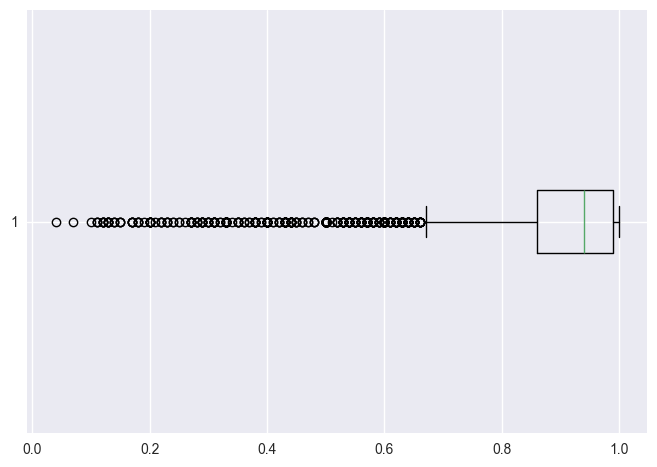

In [80]:
plt.boxplot(x='UpvoteRatio', data=df, vert=False)

In [81]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [82]:
ext = df['Title']

words = ext.to_string().split()
text = [w.lower() for w in words if w.isdigit() == False]
len(text)

70802

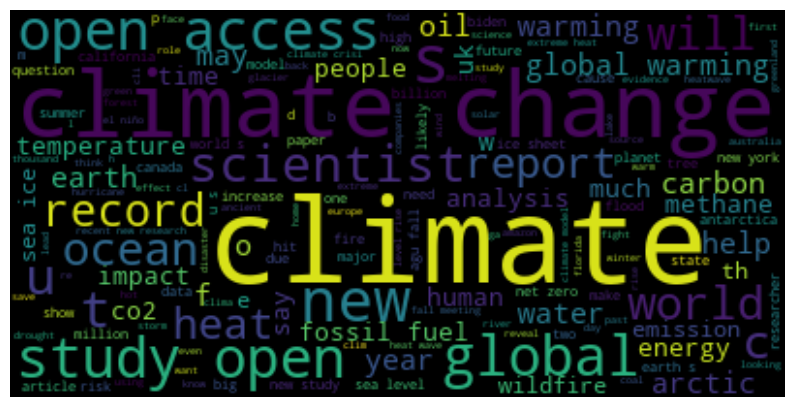

In [83]:
unique_words = ' '.join(text)
wordcloud = WordCloud().generate(unique_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### TD-IDF

In [84]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = df['Title']

tfidf = TfidfVectorizer(ngram_range=(1, 3))
feature_matrix = tfidf.fit_transform(text_data)
arr = feature_matrix.toarray()

In [85]:
arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(8)

y_clusters = kmeans.fit_predict(arr)

C:\Users\acorr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
colors = np.array(['red', 'blue', 'pink', 'magenta', 'lime', 'purple', 'green', 'yellow'])

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(arr)

In [89]:
len(result[:,0])

9393

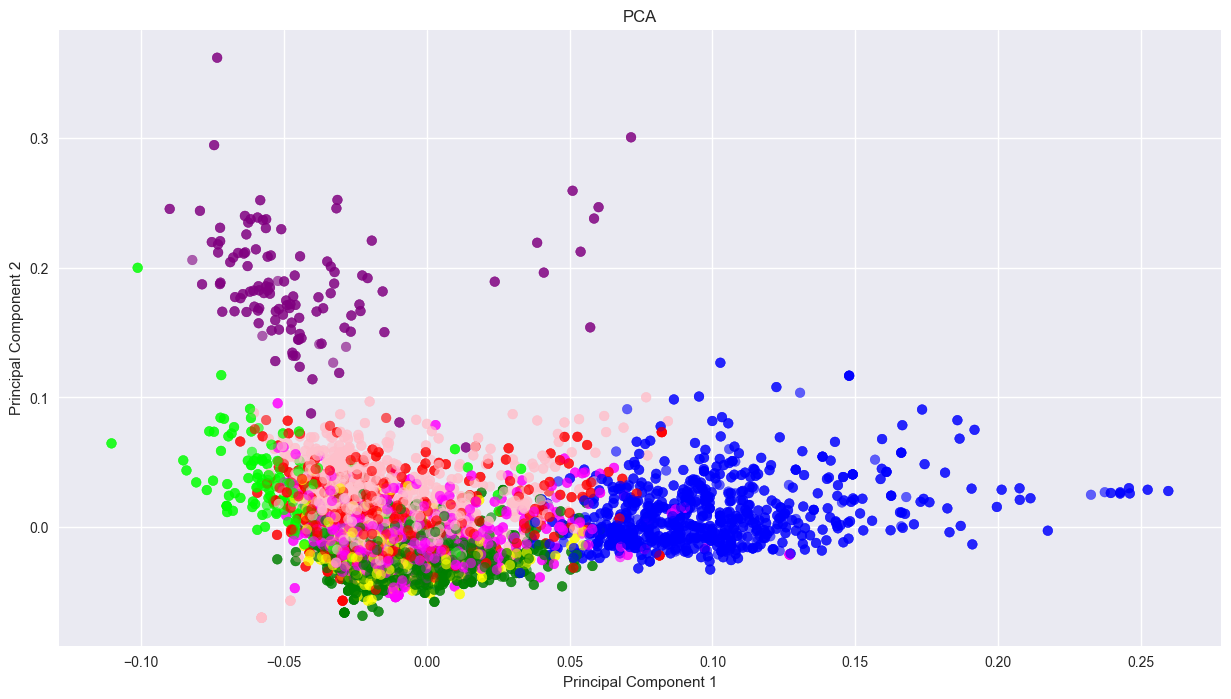

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(result[:,0], result[:,1], alpha=0.6, c=colors[y_clusters])
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [10]:
%pip install pycountry-convert

   ---------------------------------------- 0.0/325.1 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/325.1 kB 1.9 MB/s eta 0:00:01
   ------------------------------ --------- 245.8/325.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 325.1/325.1 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.3 kB ? eta -:--:--
   ---------------------------------------- 203.3/203.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycountry


In [13]:
import pycountry_convert as pc

def get_continent(country_name: str) -> str:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

In [14]:
get_continent("Colombia")
import pycountry_convert as pc
import json

def get_continent(value: str) -> str:

    value = value.replace("None", "null").replace("'", '"')
    obj = json.loads(value)
    country_name = "+" if len(obj) > 0 else "1" # obj["name"]
    return country_name
    
    # country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    # continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    # continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    # return continent_name

df['Continent'] = df['ProductionCountries'].apply(get_continent)
df['Continent'].value_counts()

'South America'